#Importando a Base de Dados

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/tips.csv')
df.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Renomeando as colunas

In [ ]:
df.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
rename = {
    'total_bill':'valor_da_conta',
    'tip':'gorjeta',
    'dessert':'sobremesa',
    'day':'dia_da_semana',
    'time':'hora_do_dia', 'size':'total_de_pessoas'
}

In [ ]:
gorjetas = df.rename(columns=rename)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


Renomeando os dados

In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map({'No':'Não','Yes':'Sim'})

# Plotando os dados

In [ ]:
#Analise 1 - valor da conta e gorjeta
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

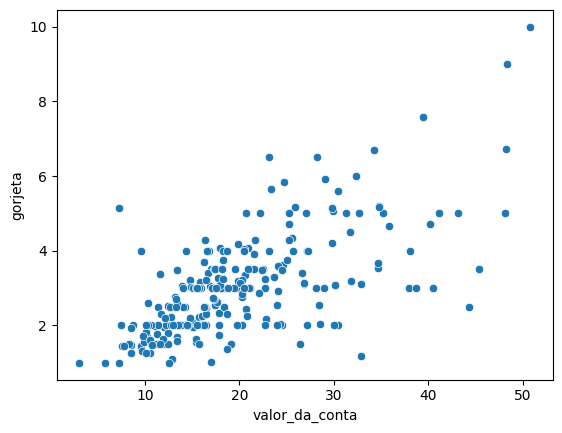

In [ ]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

 - Vizualmente o valor da gorjeta aumenta conforme o valor da compra aumenta


## Criando o campo porcentagem

In [ ]:
gorjetas['porcentagem'] = (gorjetas['gorjeta']/gorjetas['valor_da_conta']).round(2)

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Sun,Dinner,2,0.06
1,10.34,1.66,Não,Sun,Dinner,3,0.16
2,21.01,3.50,Não,Sun,Dinner,3,0.17
3,23.68,3.31,Não,Sun,Dinner,2,0.14
4,24.59,3.61,Não,Sun,Dinner,4,0.15


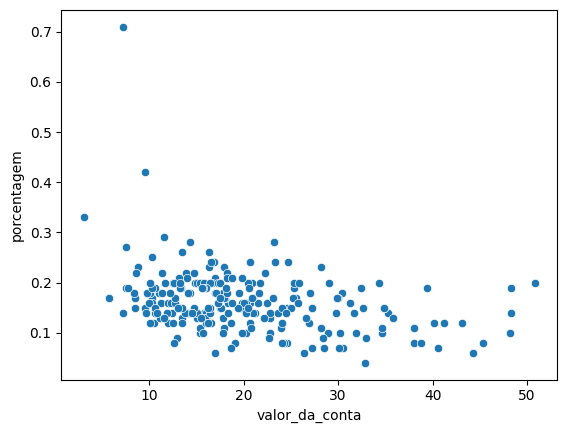

In [ ]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

- Vizualmente, o valor da conta não é proporcional ao valor da gorjeta

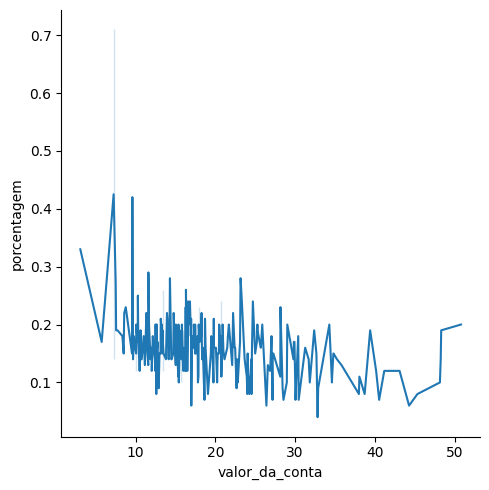

In [ ]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas, kind = 'line')

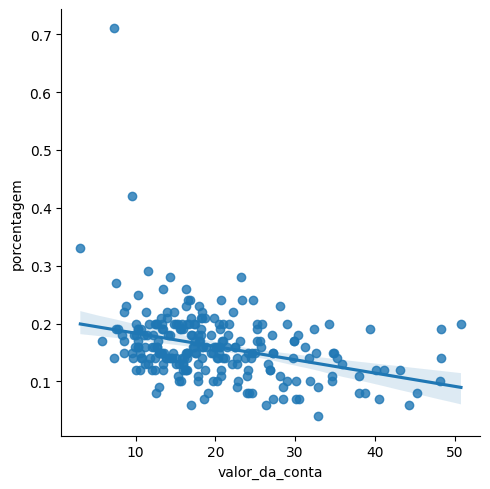

In [ ]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem',data = gorjetas)

## 2 Analise - Sobremesa

In [ ]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [ ]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


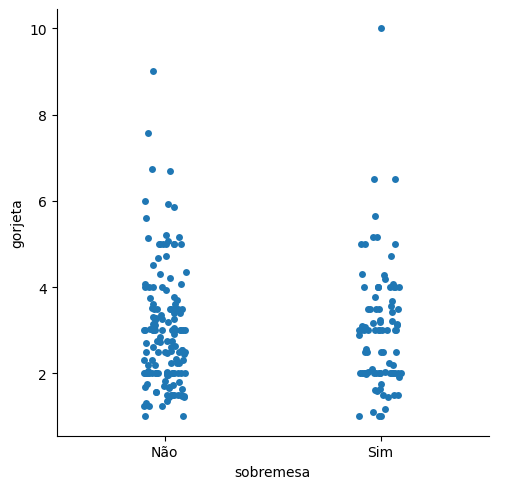

In [ ]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

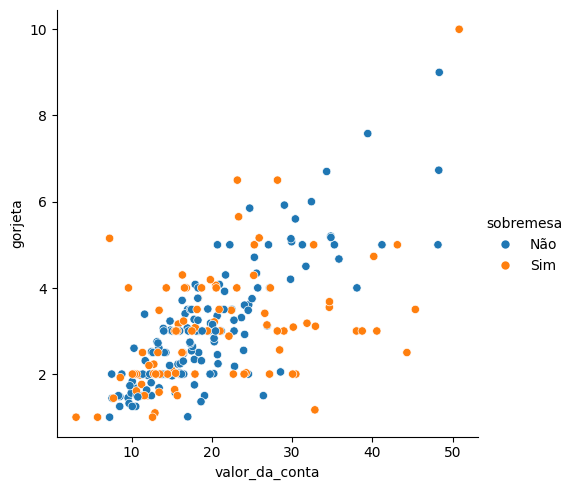

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

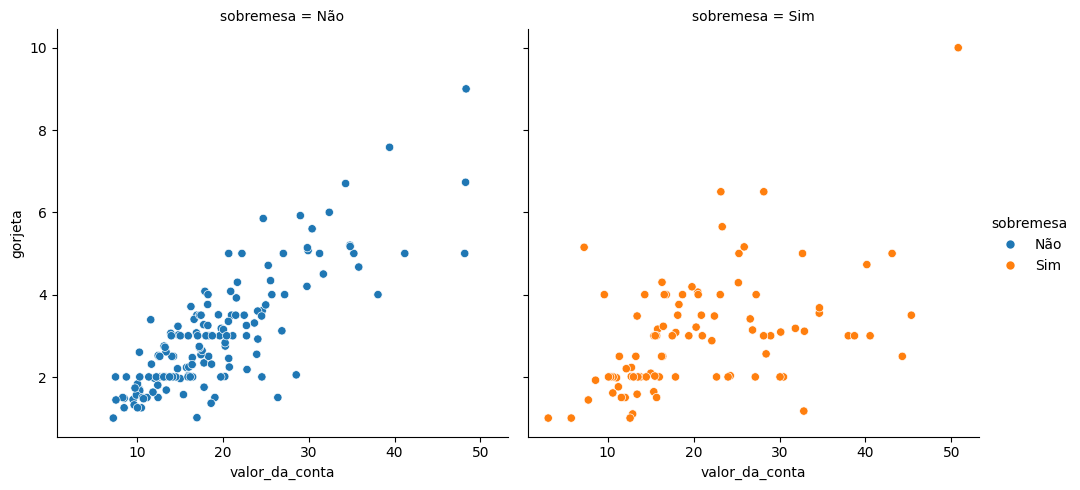

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa',col = 'sobremesa', data = gorjetas)

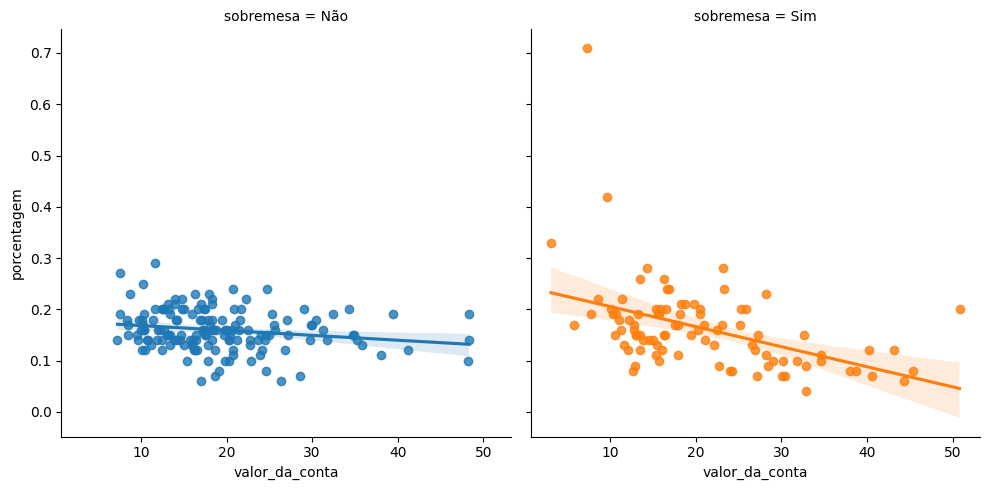

In [ ]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem',hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

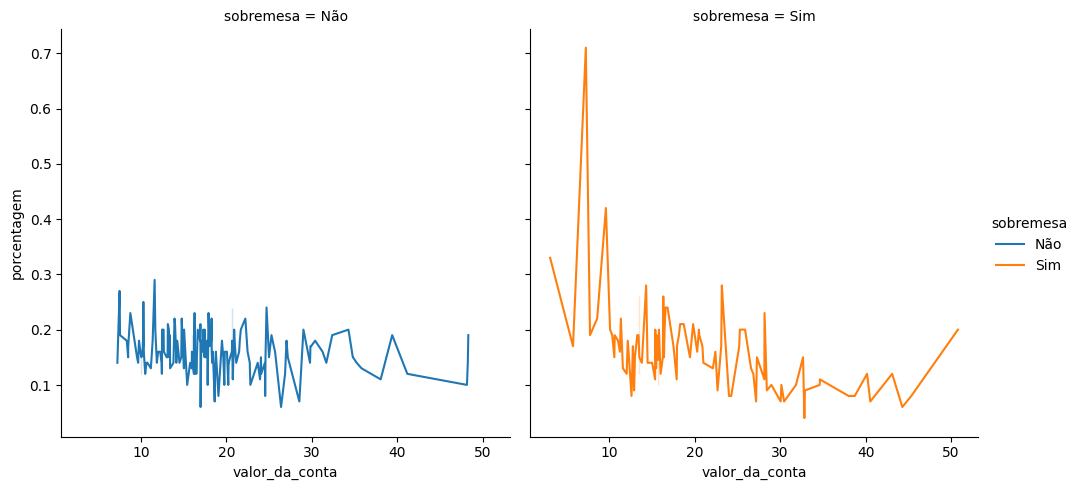

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'sobremesa',kind = 'line',col = 'sobremesa', data = gorjetas)

# Teste de Hipotese

**H<sup>null</sup>**
>**A distribuicao da taxa de gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
>**A distribuicao da taxa de gorjeta não é a mesma nos dois grupos**

In [ ]:
from scipy.stats import ranksums

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'")['porcentagem']

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'")['porcentagem']

In [ ]:
r = ranksums(sobremesa, sem_sobremesa)

In [ ]:
print('p-value:{}'.format(r.pvalue))

p-value:0.5266635660124415


**H<sup>null</sup>**
>**A distribuicao da taxa de gorjeta é a mesma nos dois grupos**

# Analise 3 - Dias da Semana

In [ ]:
gorjetas['dia_da_semana'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

<ipython-input-28-d863dd3072db>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta',palette="Set1" ,data = gorjetas)


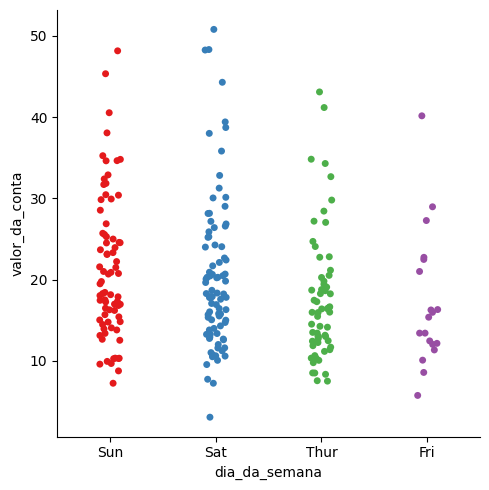

In [ ]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta',palette="Set1" ,data = gorjetas)

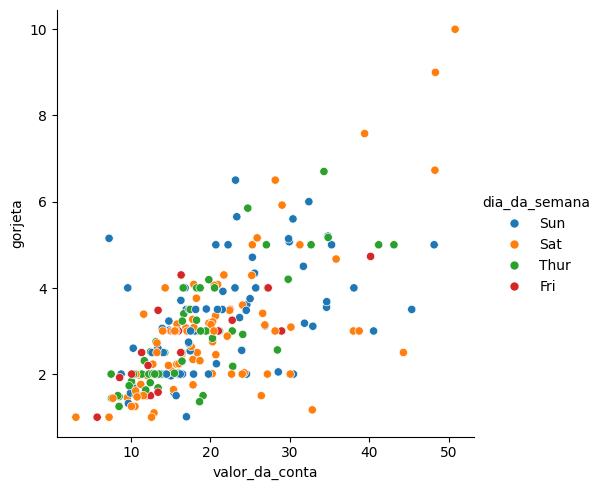

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas)

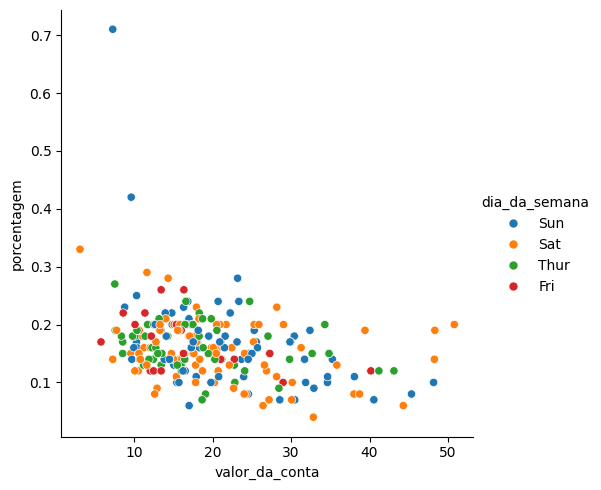

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas)

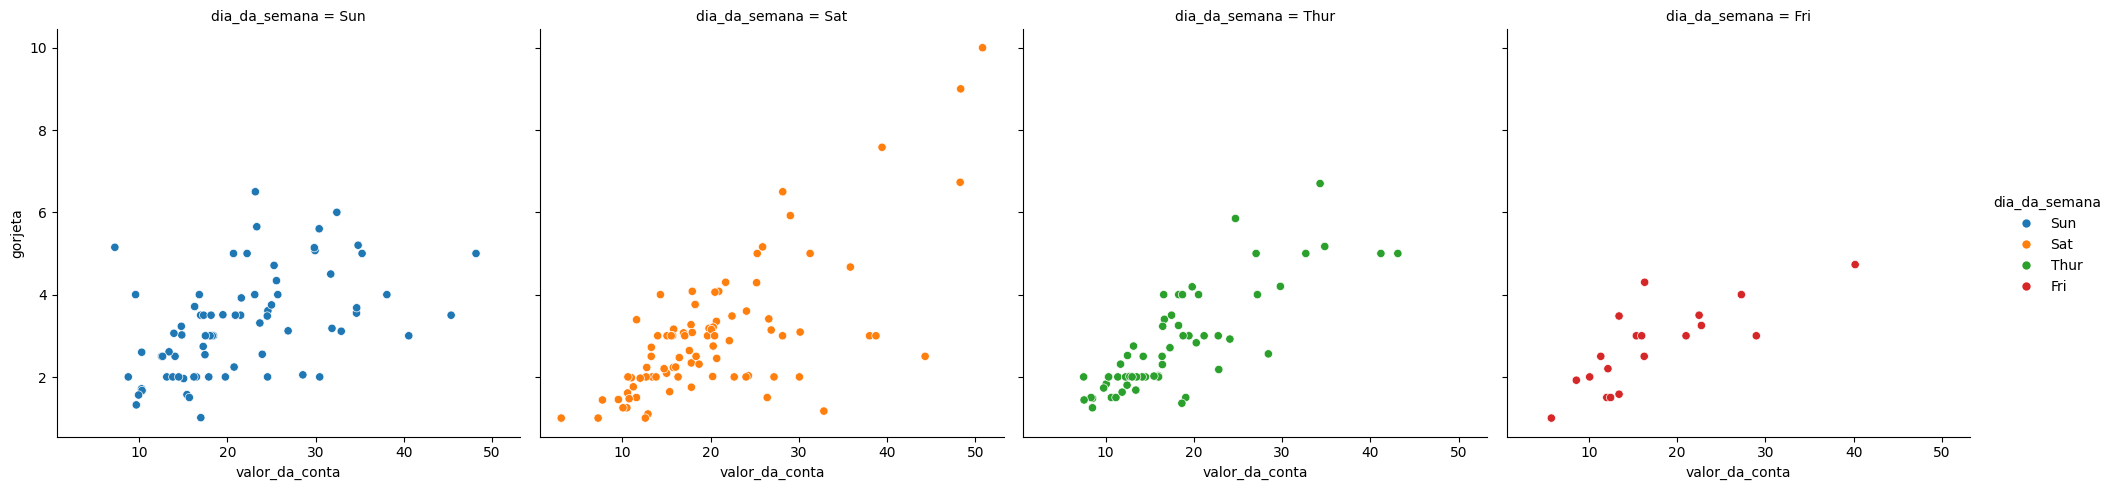

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana',col = 'dia_da_semana', data = gorjetas)

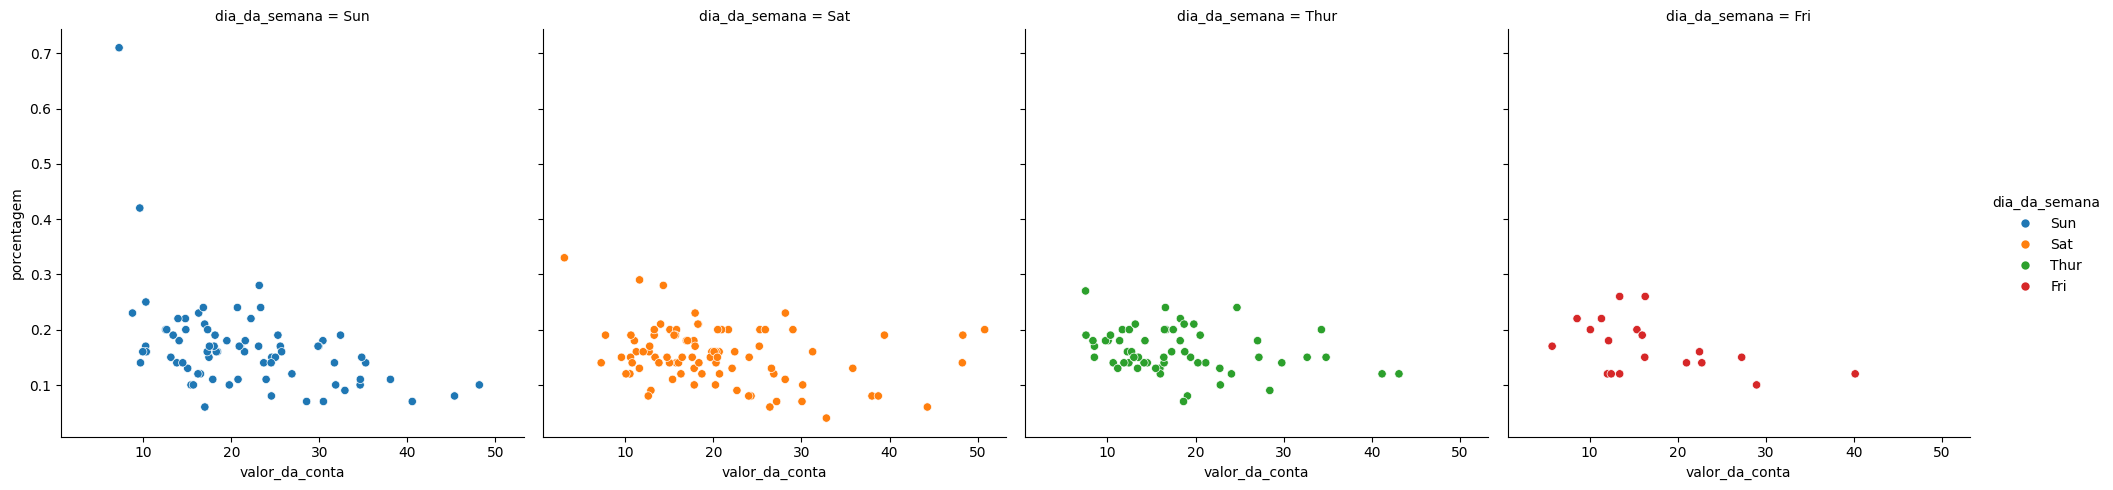

In [ ]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana',col = 'dia_da_semana', data = gorjetas)

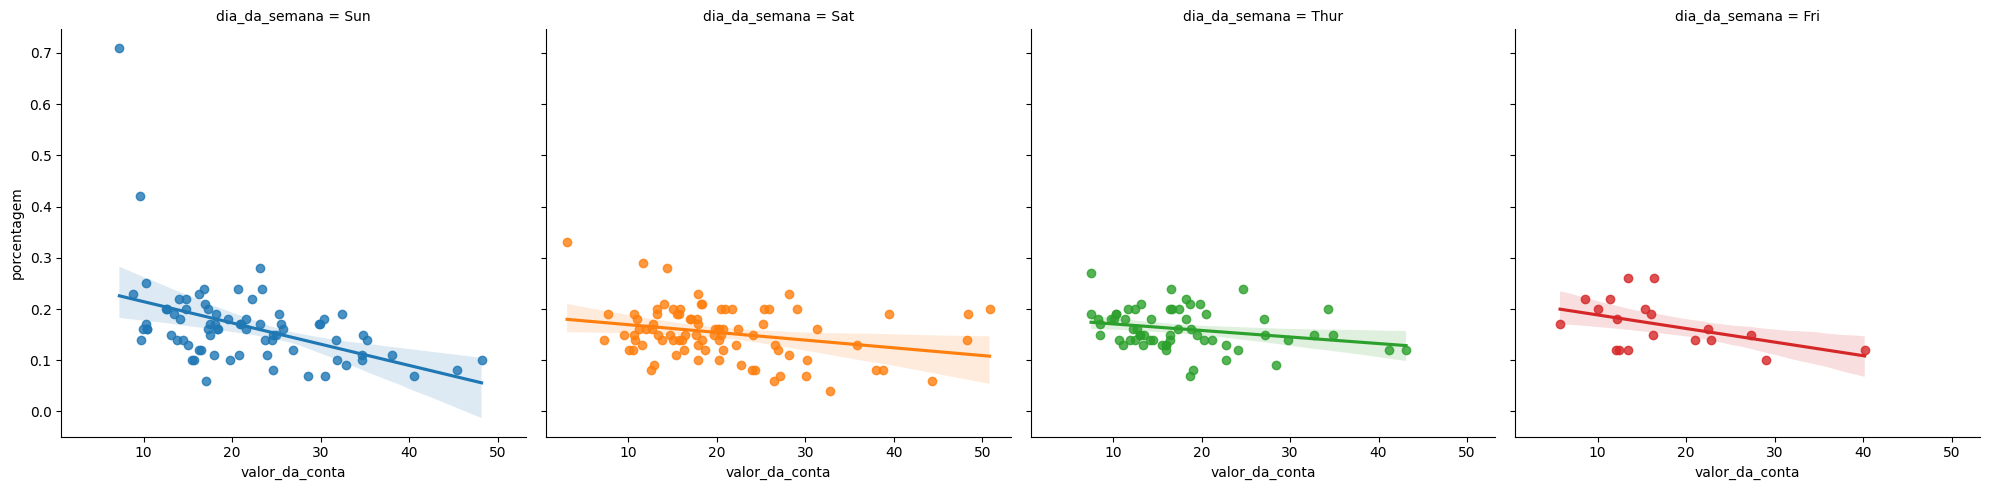

In [ ]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana',col = 'dia_da_semana', data = gorjetas)

In [ ]:
media_geral_gorjetas = gorjetas['gorjeta'].mean()
media_geral_gorjetas

2.99827868852459

In [ ]:
gorjetas.groupby(['dia_da_semana']).mean(numeric_only=True)[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Fri,17.151579,2.734737,0.169474
Sat,20.441379,2.993103,0.153678
Sun,21.410000,3.255132,0.166974
Thur,17.682742,2.771452,0.161129


In [ ]:
gorjetas['dia_da_semana'].value_counts()

,count
dia_da_semana,
Sat,87
Sun,76
Thur,62
Fri,19


## teste de hipotese

**H<sup>null</sup>**
>**A distribuicao no valor da conta é a mesma no sabádo e domingo**

**H<sup>alt</sup>**
>**A distribuicao da valor da conta não é a mesma sabádo e domingo**

In [ ]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Sun'")['valor_da_conta']

In [ ]:
valor_conta_sab = gorjetas.query("dia_da_semana == 'Sat'")['valor_da_conta']

In [ ]:
ranksums(valor_conta_domingo, valor_conta_sab)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

Hnull

A distribuicao no valor da conta é a mesma no sabado e domingo

Plotando almoco e jantar

<ipython-input-42-ff34c6161efb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas, palette="Set1", kind = 'swarm')


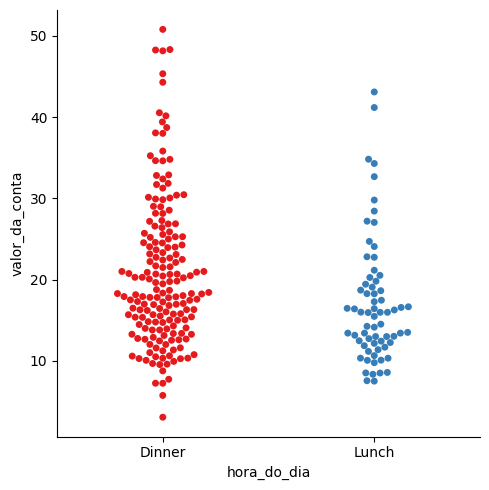

In [ ]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas, palette="Set1", kind = 'swarm')

<ipython-input-44-8ab535d341f6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas, palette="Set1")


<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

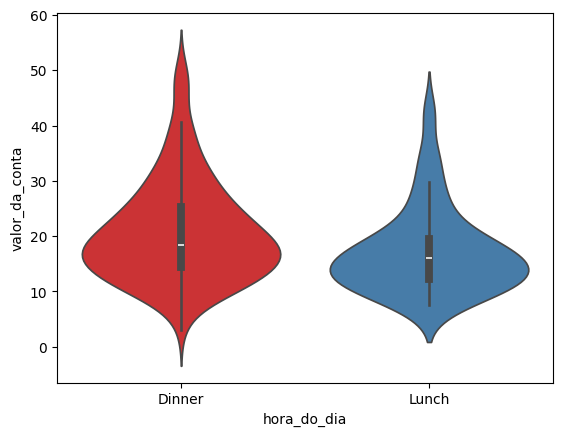

In [ ]:
sns.violinplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas, palette="Set1")

<ipython-input-46-5cf0205644e9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas, palette="Set1")


<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

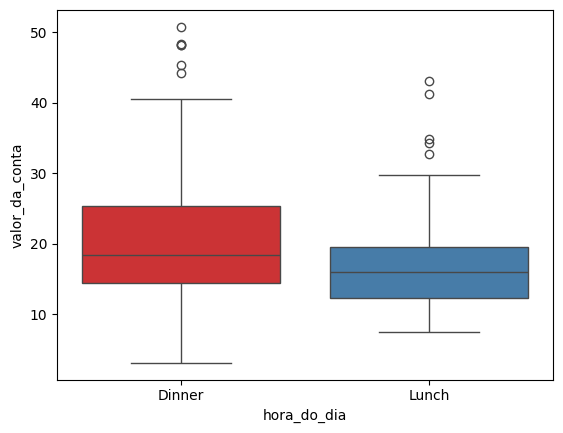

In [ ]:
sns.boxplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas, palette="Set1")

In [ ]:
almoco = gorjetas.query("hora_do_dia == 'Lunch'")['valor_da_conta']

<ipython-input-50-d65ffedbb31c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(almoco, kde = False)


<Axes: xlabel='valor_da_conta'>

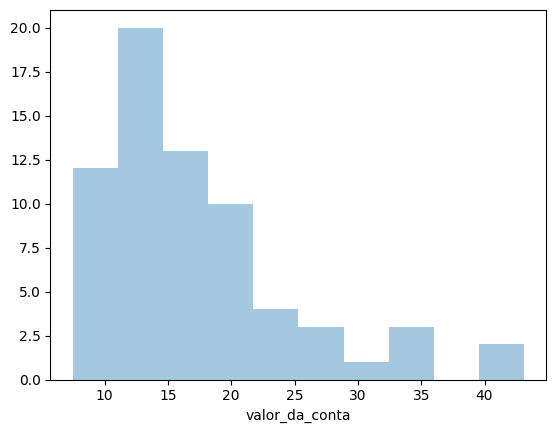

In [ ]:
sns.distplot(almoco, kde = False)

In [ ]:
jantar = gorjetas.query("hora_do_dia == 'Dinner'")['valor_da_conta']

<ipython-input-53-f0d965326ffc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(jantar,kde = False)


<Axes: xlabel='valor_da_conta'>

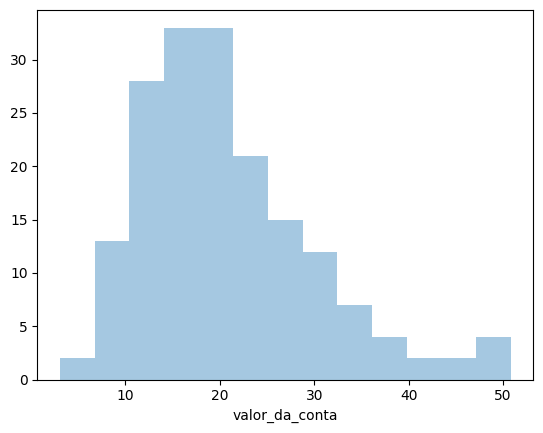

In [ ]:
sns.distplot(jantar,kde = False)

In [ ]:
gorjetas.groupby('hora_do_dia')[['valor_da_conta', 'gorjeta', 'porcentagem']].mean()

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Dinner,20.797159,3.102670,0.159773
Lunch,17.168676,2.728088,0.163971


## Teste de hipotese
**H<sup>null</sup>**
>**A distribuicao no valor da conta é a mesma no jantar e almoco**

**H<sup>alt</sup>**
>**A distribuicao da valor da conta não é a mesma no jantar e almoco**

In [ ]:
r2 = ranksums(jantar,almoco)

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

>**A distribuicao da valor da conta não é a mesma no jantar e almoco**

In [ ]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Lunch'")['porcentagem']

In [ ]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Dinner'")['porcentagem']

In [ ]:
ranksums(porcentagem_almoco, porcentagem_jantar)

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)